# FFT Practice

In [30]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.signal import hilbert

In [31]:
import z_dependancy as z_dep

%matplotlib

In [32]:
%matplotlib inline

In [33]:
plt.rc('font', size=20)

In [34]:
fs  = 10
T = 1
t=np.linspace(1/fs, T, fs) 
tt=np.linspace(1/fs,T,1000)

set f in range 0 to 10

[0, 1, -1.1, 1.1]

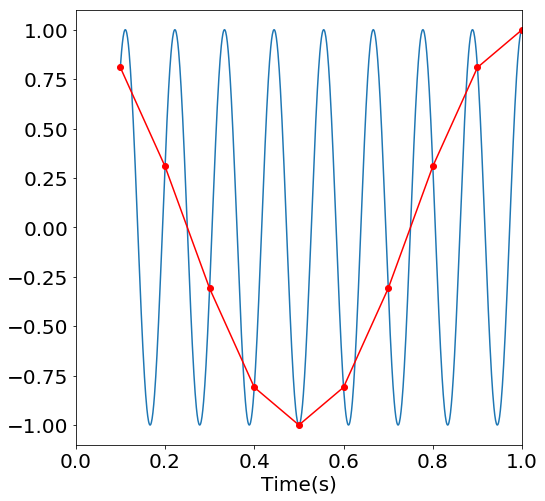

In [39]:
f=9

x=np.cos(2*np.pi*f*t)
xx=np.cos(2*np.pi*f*tt)

plt.figure(figsize=(8,8))
plt.plot(tt,xx)
plt.plot(t,x,'r-o')
plt.xlabel('Time(s)')
plt.axis([0, 1, -1.1, 1.1])

## Signal Generation for FFT Practice

In [87]:
fs = 100           # Sampling frequency                    
T = 1
t = np.linspace(1/fs, T, fs*T)
w = 10

x=2*np.cos(2*np.pi*w*t)

Text(0.5, 0, 't(sec)')

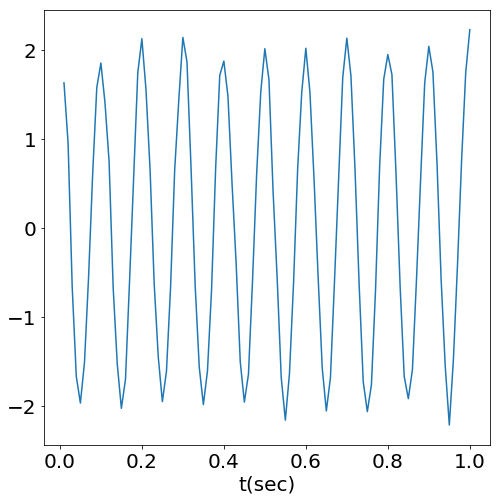

In [88]:
tmp_shape=np.shape(t)

## Random Noise
xn = x + 0.1 * np.random.randn(*tmp_shape)

plt.figure(figsize=(8,8))
plt.plot(t,xn)
plt.xlabel('t(sec)')

## FFT using the function

In [89]:
f, A = z_dep.z_fft_simple(xn,fs)

(9, 11)

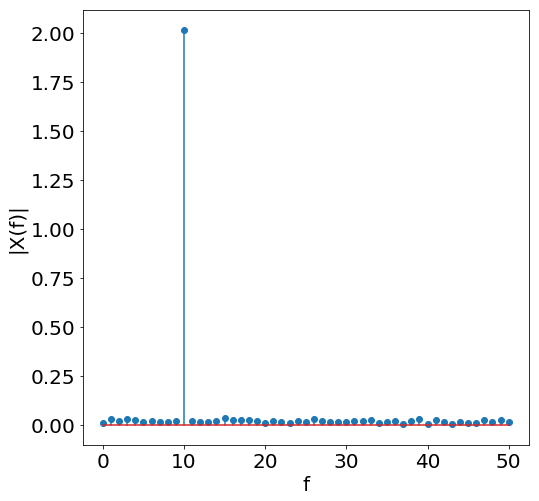

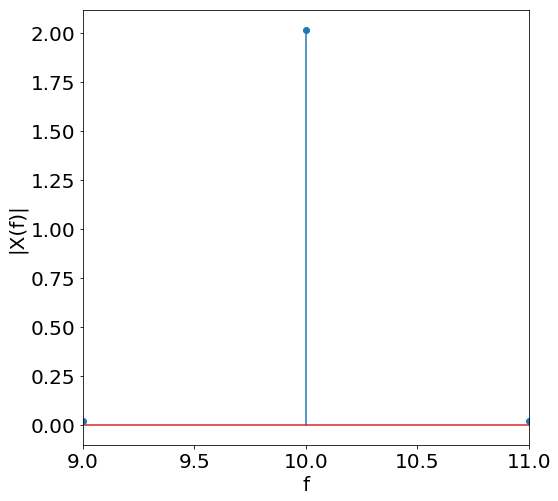

In [90]:
plt.figure(figsize=(8,8))
plt.stem(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)|')

plt.figure(figsize=(8,8))
plt.stem(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.xlim([w-1, w+1])

## Zero-padding

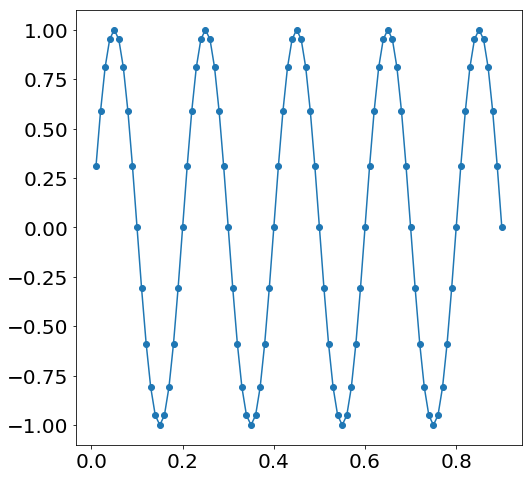

In [91]:
fs=100
T=0.9
w=5
t=np.arange(1/fs,T+1/fs,1/fs)
v=np.sin(2*np.pi*w*t)
plt.figure(figsize=(8,8))
plt.plot(t,v,'-o')

(0, 10)

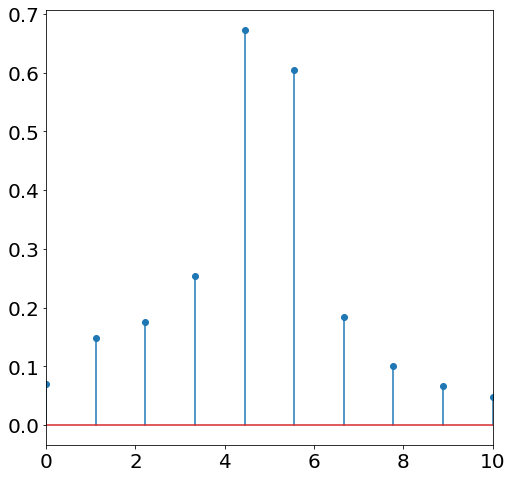

In [92]:
f, A=z_dep.z_fft_simple(v,fs)
plt.figure(figsize=(8,8))
plt.stem(f,A)
plt.xlim([0,10])

T (sampling period): 0.9
fs (sampling frequency): 100
Original Data Size (fs*T): (90,)
Required Data Size: (10,)
Added Data Size: (100,)


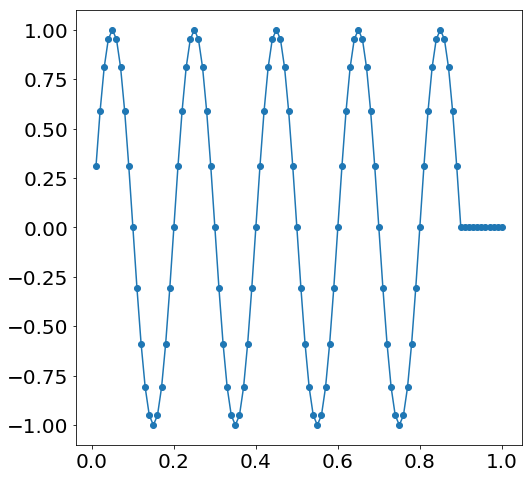

In [97]:
freq_res=1/T
t_add=t[-1]+np.arange(1/fs,0.1+1/fs,1/fs)

t_added=np.append(t,t_add)
v_add=np.zeros(np.shape(t_add))
v_added=np.append(v,v_add)

print('T (sampling period): {}'.format(T))
print('fs (sampling frequency): {}'.format(fs))


print('Original Data Size (fs*T): {}'.format(t.shape))
print('Required Data Size: {}'.format(t_add.shape))
print('Added Data Size: {}'.format(t_added.shape))

plt.figure(figsize=(8,8))
plt.plot(t_added,v_added,'-o')

(0, 10)

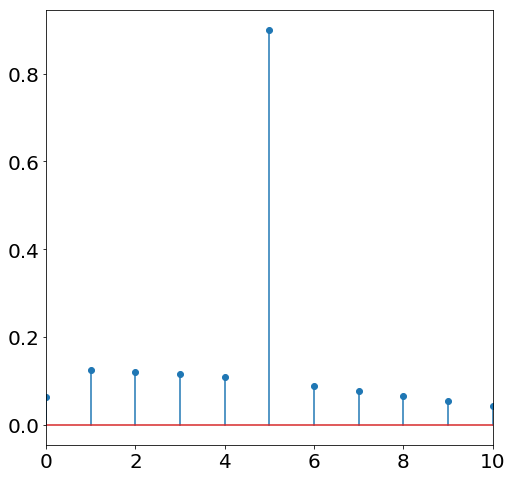

In [20]:
f,A=z_dep.z_fft_simple(v_added,fs)
plt.figure(figsize=(8,8))
plt.stem(f,A)
plt.xlim([0,10])

(0, 10)

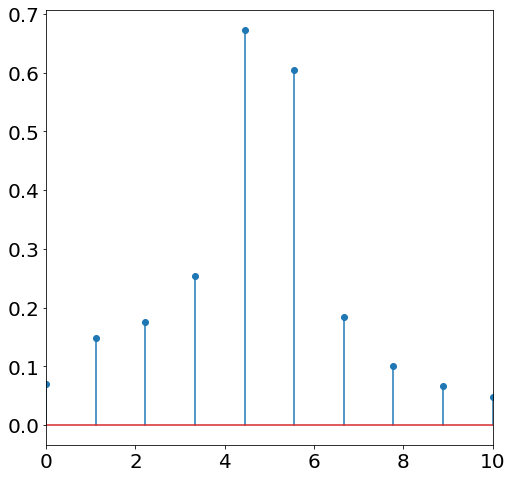

In [21]:
f,A=z_dep.z_fft_simple(v,fs)
plt.figure(figsize=(8,8))
plt.stem(f,A)
plt.xlim([0,10])

## Envelop Analysis Modulated Signal

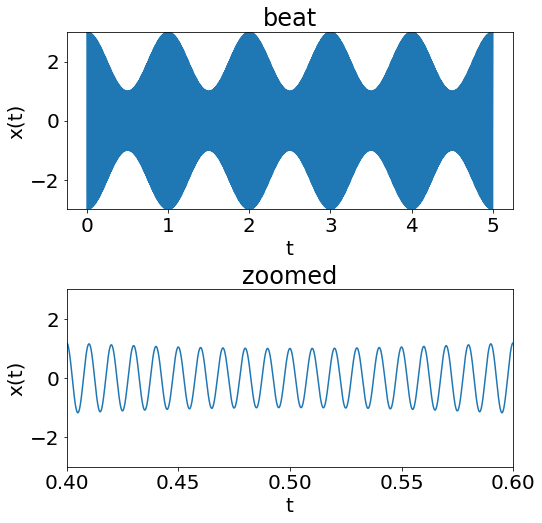

In [22]:
fs=44100
T=1/fs
N=5*fs
t=np.arange(0,N,1) * T

sig=np.cos(2*np.pi*1*t)+2
carrier=np.cos(2*np.pi*100*t)

x=sig*carrier

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('beat')
plt.ylim([-3,3])

plt.subplot(2,1,2)
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('zoomed')
plt.ylim([-3,3])
plt.xlim([0.4,0.6])
plt.subplots_adjust(hspace=0.45)

## FFT of the modulated signal (using the function)

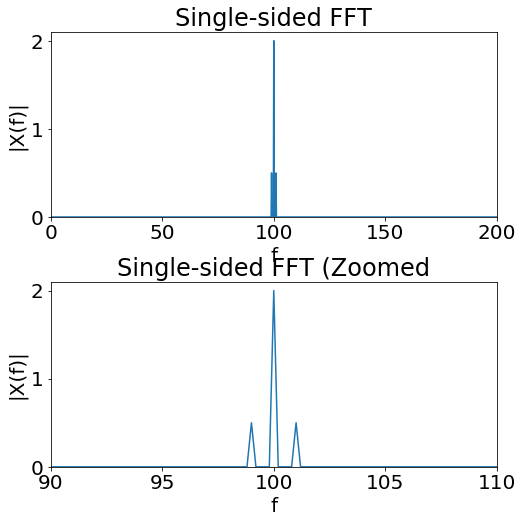

In [23]:
f,A=z_dep.z_fft_simple(x,fs)

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
# plt.stem(f,A)
plt.plot(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.title('Single-sided FFT')
plt.xlim([0,200]) 
plt.ylim([0,2.1])

plt.subplot(2,1,2)
# plt.stem(f,A)
plt.plot(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.title('Single-sided FFT (Zoomed')
plt.xlim([90,110])
plt.ylim([0,2.1])

plt.subplots_adjust(hspace=0.35)

## Extract envelope using Hilbert transform

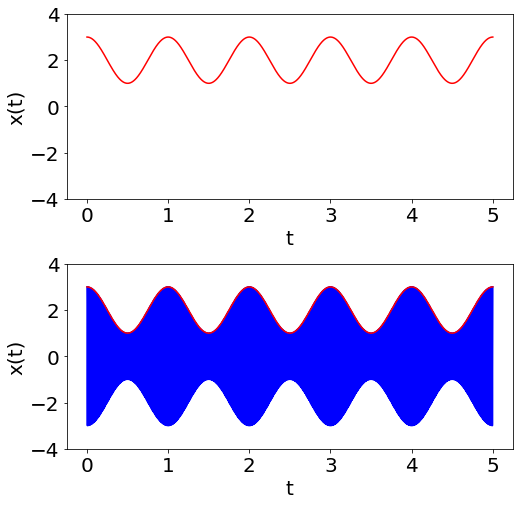

In [24]:
x_hilbert=hilbert(x,axis=0)
x_envelop = abs(x_hilbert)

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(t,x_envelop,'r')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim([-4,4])

plt.subplot(2,1,2)
plt.plot(t,x,'b')
plt.plot(t,x_envelop,'r')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim([-4,4])

plt.subplots_adjust(hspace=0.35)

## FFT of envelope

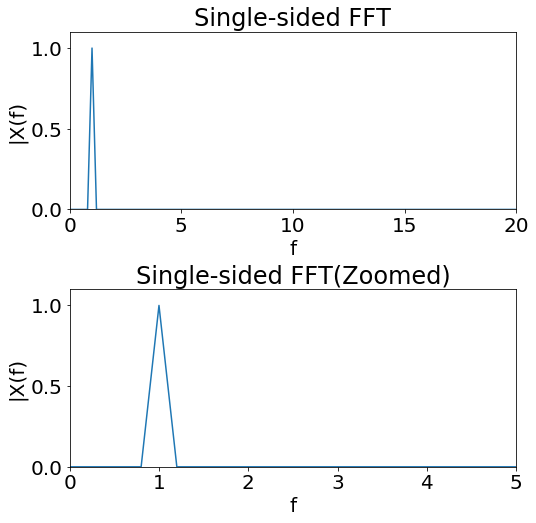

In [25]:
f,A=z_dep.z_fft_simple(x_envelop-np.mean(x_envelop),fs)

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
# plt.stem(f,A)
plt.plot(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Single-sided FFT')
plt.axis([0,20,0,1.1])

plt.subplot(2,1,2)
# plt.stem(f,A)
plt.plot(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Single-sided FFT(Zoomed)')
plt.axis([0,5,0,1.1])

plt.subplots_adjust(hspace=0.45)